In [8]:
pip install -e "/Users/adam.santorelli/lib/wristpy/"

Obtaining file:///Users/adam.santorelli/lib/wristpy
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Obtaining dependency information for scikit-learn<2.0.0,>=1.4.1.post1 from https://files.pythonhosted.org/packages/18/ff/919087b9aa5318c3992def31b74e019eee39c57ff6bf140289041df3db86/scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.8 MB/s eta 0:00:0000:010:01
  Building editable for wristpy (pyproject.toml) ... done
  Created wheel for wristpy: filename=wristpy-0.1.0-py3-none-any.whl size=11926 sha256=0840a6476e56ee1f92c054cf572be7ca6fecefd971d7ee7e371fdfbcf4b2c1b2
  Stored in directory: /private/var/folders/5w/nz07xc215vv587tk6xcmwdg40000gq/T/pip-ephem-wheel-cache-0_i0n6_p/wheels/f5/62/c3/9c628b38fd17d2883865753005ffb35a450c56a42799ed8f40
Successfully

In [9]:
file_name = '/Users/adam.santorelli/Documents/NDARAA948MFH.gt3x'


In [10]:
import wristpy

In [11]:
from wristpy.common import data_model

In [12]:
from wristpy.io.loaders import gt3x

In [13]:
test_config = wristpy.common.data_model.Config(file_name, file_name)
test_config.path_input

'/Users/adam.santorelli/Documents/NDARAA948MFH.gt3x'

In [14]:
test_data = gt3x.load(test_config.path_input)

In [15]:
test_data.time

array(['2017-10-10T12:05:00.000', '2017-10-10T12:05:00.033',
       '2017-10-10T12:05:00.066', ..., '2017-12-06T16:35:59.900',
       '2017-12-06T16:35:59.933', '2017-12-06T16:35:59.966'],
      dtype='datetime64[ms]')

In [16]:
test_data.acceleration

X,Y,Z
f32,f32,f32
0.0,0.0625,-1.011719
-0.003906,0.03125,-1.0
-0.003906,0.0234375,-1.003906
0.0,0.027344,-1.007812
-0.003906,0.03125,-1.007812
-0.003906,0.027344,-1.007812
-0.007812,0.027344,-1.003906
-0.007812,0.0234375,-1.007812
0.0,0.0234375,-1.003906


In [19]:
from wristpy.ggir import metrics_calc
from wristpy.ggir import calibration

In [20]:
import importlib


In [43]:
importlib.reload(calibration)
importlib.reload(data_model)

<module 'wristpy.common.data_model' from '/Users/adam.santorelli/lib/wristpy/src/wristpy/common/data_model.py'>

In [44]:
test_output = calibration.start_ggir_calibration(test_data)

In [45]:
test_output.sampling_rate

30

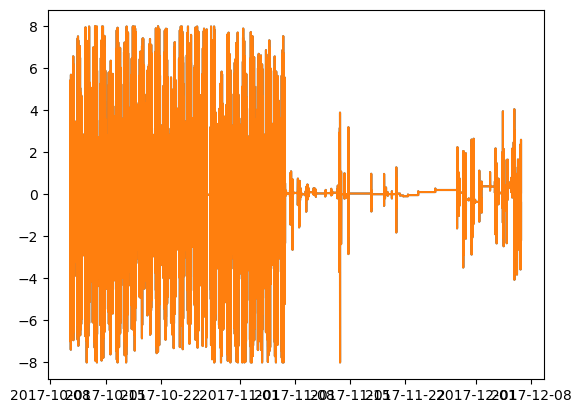

In [24]:
from matplotlib import pyplot as plt 

plt.plot(test_data.time, test_data.acceleration['X'])
plt.plot(test_output.time, test_output.cal_acceleration['X'])
plt.show()

In [60]:
importlib.reload(metrics_calc)
importlib.reload(data_model)


<module 'wristpy.common.data_model' from '/Users/adam.santorelli/lib/wristpy/src/wristpy/common/data_model.py'>

In [61]:
metrics_calc.calc_base_metrics(test_output)

In [62]:
test_output.enmo

enmo
f32
0.006151
0.0
0.0
0.001444
0.001482
0.001454
0.0
0.001467
0.0


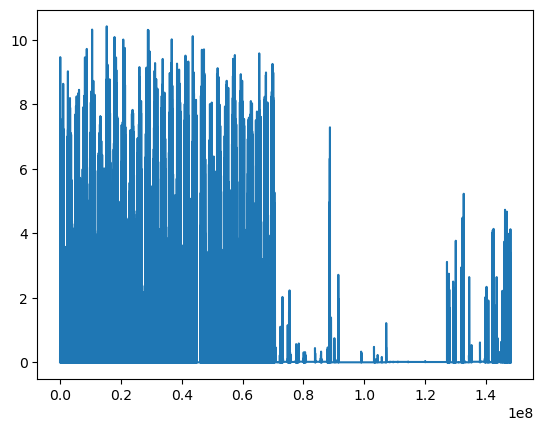

In [55]:
plt.plot(test_output.enmo)
plt.show()

In [64]:
metrics_calc.calc_epoch1_metrics(test_output)


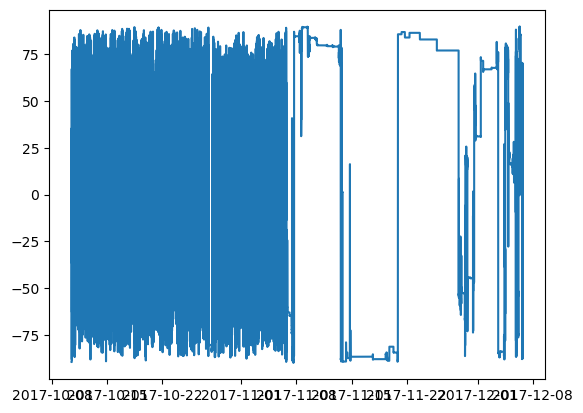

In [66]:
plt.plot(test_output.time_epoch1, test_output.anglez_epoch1)
plt.show()